# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.116815e+01     7.244191e+00
 * time: 0.004676103591918945
     1     2.710792e+01     4.361281e+00
 * time: 0.014127969741821289
     2     2.148226e+01     4.837220e+00
 * time: 0.03630995750427246
     3     1.341706e+01     1.481770e+00
 * time: 0.06474113464355469
     4     1.262634e+01     3.252100e+00
 * time: 0.08380699157714844
     5     1.258982e+01     1.713904e+00
 * time: 0.10344910621643066
     6     1.172752e+01     2.035809e+00
 * time: 0.126662015914917
     7     1.118952e+01     1.994725e+00
 * time: 0.14583110809326172
     8     1.053812e+01     1.425141e+00
 * time: 0.16956806182861328
     9     9.948712e+00     7.885592e-01
 * time: 0.1933121681213379
    10     9.704150e+00     8.072846e-01
 * time: 0.21429896354675293
    11     9.568304e+00     4.577051e-01
 * time: 0.2332780361175537
    12     9.487513e+00     4.095579e-01
 * time: 0.25255298614501953
    13     9.450954e+00     6.523677e-01
 * time: 0

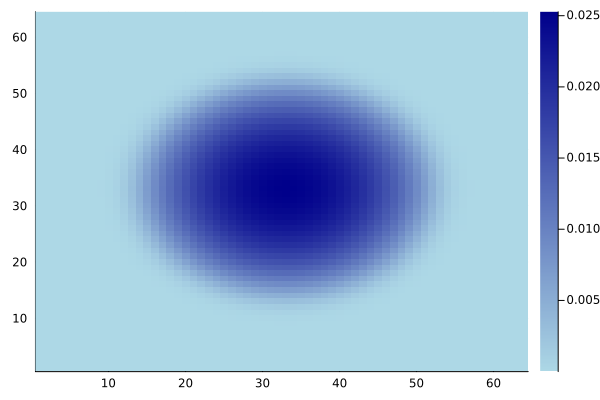

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)